## Adult Dataset Part 1: Cleaning and Preparation

#### Objectives:
1. Preprocess the data and store the cleaned dataset as adult_clean.csv
2. Load clean dataset and test supervised/unsupervised models
    - Goal: Determine best model to predict if new entry earns >50k or <50k with supervised learning
    - Goal: Find insights and patterns in data using unspuervised learning
3. Apply k-folds cross validation
    - Goal: Evaluate robustness of results across different models.
    - Goal: Use and justify different error metrics


#### Summary of dataset

Datasource: https://archive.ics.uci.edu/ml/datasets/adult

Feature descrptions copied below from the UCI website:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: Continuous. A weighting assigned from the sampling process.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous.
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- target: >50K, <=50K.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#original data does not come with headers. add headers based on the documentation descrptiong
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'target']

In [5]:
data = pd.read_csv('./data/adult.data', names = headers)
df = data.copy()


In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


On first look, it appears there are no missing values. **However the dataset descrption indicates that missing values have been flled with '?'.** Figure out what to do here :)

In [8]:
#code
df = df.replace(' ?', np.nan)

Before deciding **how to deal with the missing values want to know how they influence the data**. For example, if workclass and occupation for example both have missing values (in the same tuple) it would be reasonable to drop the data.

In [9]:
#code
df_clean = df.dropna(thresh=2, subset=['workclass', 'occupation', 'native-country'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30725 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30725 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          30725 non-null  int64 
 3   education       30725 non-null  object
 4   education-num   30725 non-null  int64 
 5   marital-status  30725 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    30725 non-null  object
 8   race            30725 non-null  object
 9   sex             30725 non-null  object
 10  capital-gain    30725 non-null  int64 
 11  capital-loss    30725 non-null  int64 
 12  hours-per-week  30725 non-null  int64 
 13  native-country  30169 non-null  object
 14  target          30725 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.8+ MB


**What % of the dataset do nans represent?** What is the **best approach** for dealing with the nan's?

In [10]:
# percentage of dropped rows
(1 - df_clean.size / df.size)  * 100

5.638647461687296

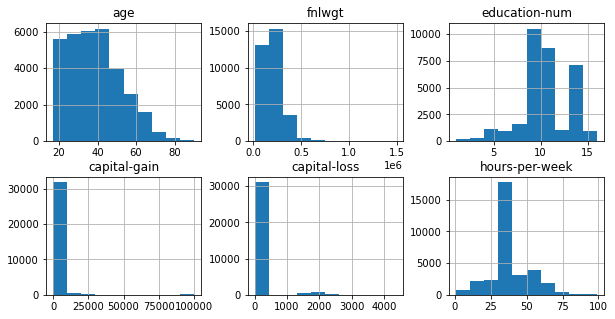

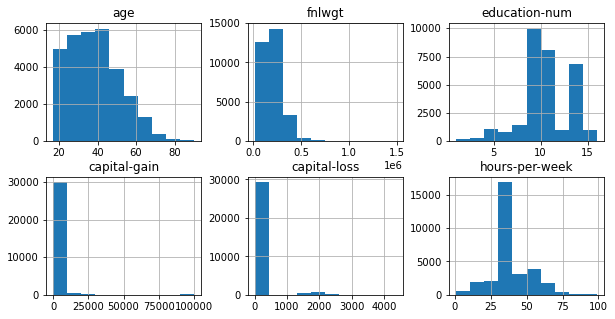

In [11]:
#plot the numerical columns
df.hist(layout=(2,3), figsize=(10, 5))
df_clean.hist(layout=(2,3), figsize=(10, 5))
plt.show()

#### Additional Steps:
1. Apply statistical tests to determine if dropping values changes the structure of the distribution in the workplace, occupation, and native-country categories i.e. t-test for differnce of modes. 
2. Compare filling the workplace and occupation columns with mode values and applying same statistical tests.

In [12]:
df.occupation=df.occupation.fillna(df.occupation.mode())
df.workclass=df.workclass.fillna(df.workclass.mode())
df['native-country']=df['native-country'].fillna(df['native-country'].mode())

In [13]:
df_clean = df_clean.reset_index(drop=True)

In [22]:
#train / test... you know the drill
from sklearn.model_selection import train_test_split
X = df_clean.drop(['target', 'education'], axis=1)
X = pd.get_dummies(X)
y = df_clean['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
X = df.drop(['target', 'education'], axis=1)
X = pd.get_dummies(X)
y = df['target']
Xmode_train, Xmode_test, ymode_train, ymode_test = train_test_split(X, y, test_size = 0.2, stratify=y)

In [15]:
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
1873,49,128132,9,0,0,60,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
21954,41,174395,16,15024,0,55,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10942,31,129804,5,0,0,40,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3805,41,52037,10,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
28190,33,347623,14,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11709,59,117299,9,0,1887,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19886,23,283796,8,0,0,30,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
25476,41,149909,9,0,1848,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
577,52,51048,13,0,0,55,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC()
svc = svc.fit(X_train, y_train)
svc_mode = SVC()
svc_mode = svc.fit(Xmode_train, ymode_train)

In [17]:
svc.score(X_test, y_test)

0.7856794141578519

In [18]:
svc_mode.score(Xmode_test, ymode_test)

0.7956394902502687

In [23]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.860699755899105

In [25]:
X = df.drop(['target', 'education', 'marital-status', 'native-country'], axis=1)
for f in ['workclass', 'occupation', 
          'relationship', 'race', 'sex']:
    labels = {}
    for idx, class_ in enumerate(set(X[f])):
        labels[class_] = idx
    for idx, class_ in enumerate(X[f]):
        X.at[idx, f] = labels[class_]
y = df['target']
X

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,39,5,77516,13,11,0,2,0,2174,0,40
1,50,1,83311,13,12,3,2,0,0,0,13
2,38,8,215646,9,8,0,2,0,0,0,40
3,53,8,234721,7,8,3,0,0,0,0,40
4,28,8,338409,13,14,2,0,1,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,8,257302,12,4,2,2,1,0,0,38
32557,40,8,154374,9,9,3,2,0,0,0,40
32558,58,8,151910,9,11,5,2,1,0,0,40
32559,22,8,201490,9,11,4,2,0,0,0,20


In [26]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8564058469475494

In [ ]:
svc = SVC(C = 10, kernel='poly')
svc.fit(X, y)
svc.score(X_test, y_test)

In [29]:
X = df.drop(['target', 'education', 'marital-status', 'native-country'], axis=1)
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8539491462965237

# Discussion of results

# the last svc just won't finish...